# Diabetes Classifier - SVM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

### Testing on Balanced dataset

In [2]:
diabetes_balanced = pd.read_csv(r"diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
diabetes_balanced.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [3]:
diabetes_balanced.shape
diabetes_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [4]:
columns_to_drop = [
    'CholCheck',
    'Stroke',
    'HvyAlcoholConsump',
    'AnyHealthcare',
    'NoDocbcCost',
    'Education',
]

diabetes_balanced = diabetes_balanced.drop(columns = columns_to_drop)

In [5]:

diabetes_balanced.head()

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Income
0,0.0,1.0,0.0,26.0,0.0,0.0,1.0,0.0,1.0,3.0,5.0,30.0,0.0,1.0,4.0,8.0
1,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,8.0
2,0.0,0.0,0.0,26.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,10.0,0.0,1.0,13.0,8.0
3,0.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,3.0,0.0,3.0,0.0,1.0,11.0,8.0
4,0.0,0.0,0.0,29.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,8.0,8.0


In [6]:
X = diabetes_balanced.drop('Diabetes_binary', axis=1)
y = diabetes_balanced[['Diabetes_binary']]

In [13]:
# write a code to implement support vectir machine class from scratch wihtout using any external library for it. implement accuracy score function, Precision function, recall function, confusion matrix plot function, roc plot function  inside ths class

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, auc

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=2500):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - y_[idx] * x_i)
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return (approx >= 0).astype(int)

    def accuracy_score(self, y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    def precision(self, y_true, y_pred):
      return precision_score(y_true, y_pred)

    def recall(self, y_true, y_pred):
      return recall_score(y_true, y_pred)

    def plot_confusion_matrix(self, y_true, y_pred):
            cm = confusion_matrix(y_true, y_pred)
            plt.figure(figsize=(6, 4))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                        xticklabels=['No Diabetes', 'Diabetes'],
                        yticklabels=['No Diabetes', 'Diabetes'])
            plt.title('Confusion Matrix')
            plt.xlabel('Predicted Label')
            plt.ylabel('True Label')
            plt.show()

    def plot_roc_curve(self, X_test, y_test):
        y_pred_proba = np.dot(X_test, self.w) - self.b # using decision function as probability
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()


Accuracy = 0.7438291251149304
Precision = 0.7136607924009499
Recall = 0.8109643516545946


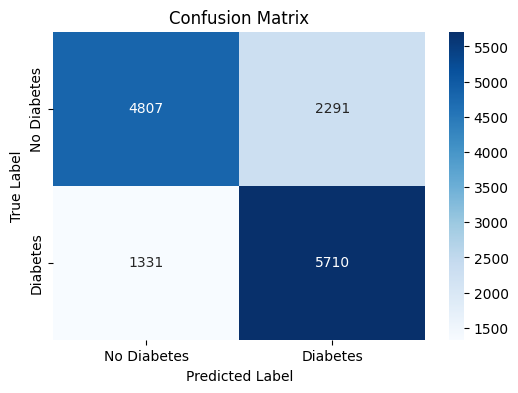

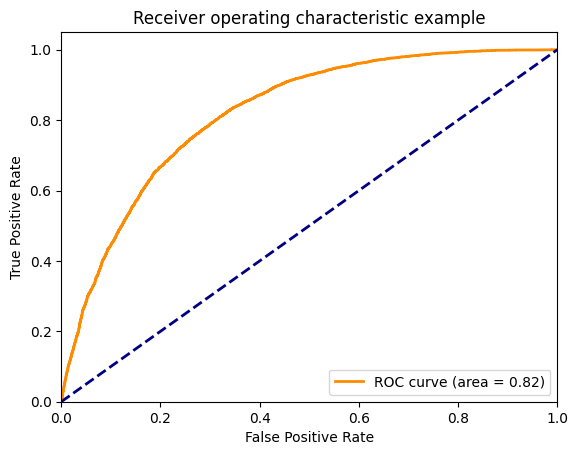

In [14]:
# test the SVM class above and test its accuracy

# Assuming X and y are defined from the previous code block
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert pandas Series to numpy arrays
X_train = X_train
X_test = X_test
y_train = y_train.to_numpy().ravel() # Flatten y_train
y_test = y_test.to_numpy().ravel()   # Flatten y_test

# Initialize and train the SVM model
svm = SVM()
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)


# Calculate the accuracy of the model
print(f'Accuracy = {svm.accuracy_score(y_test, y_pred)}')
print(f'Precision = {svm.precision(y_test, y_pred)}')
print(f'Recall = {svm.recall(y_test, y_pred)}')
svm.plot_confusion_matrix(y_test, y_pred)
svm.plot_roc_curve(X_test, y_test)
